<h1>Making an model to recongize the currency note of Pakistan</h1>


In [35]:
# importing libraries
import pandas as pd
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten, Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
import shutil
import cv2

In [2]:
# checking the lenght of the images
dir_500 = './Currency DataSet/500'
dir_1000 = './Currency DataSet/1000'
dir_5000 = './Currency DataSet/5000'
print('Number of 500 note image',len(os.listdir(dir_500)))
print('Number of 1000 note image',len(os.listdir(dir_1000)))
print('Number of 5000 note image',len(os.listdir(dir_5000)))

Number of 500 note image 132
Number of 1000 note image 100
Number of 5000 note image 31


In [3]:
dir_1000

'./Currency DataSet/1000'

In [4]:
# lets check the image size
image_shape = cv2.imread("./Currency DataSet/1000/IMG_20121203_173903.jpg")
image_shape.shape

(698, 1632, 3)

<h2>Spliting the test and validation images</h2>
as we have 132 images of 500 note so 10% of 132 will be for validation and 10% for testing
and same goes with others 

In [5]:
# making new folder for testing and validation
test_folder = os.mkdir('Test-Data')
test500 = os.mkdir('./Test-Data/500')
test1000 = os.mkdir('./Test-Data/1000')
test5000 = os.mkdir('./Test-Data/5000')

In [6]:
validation_folder = os.mkdir('Val-Data')
val500 = os.mkdir('./Val-Data/500')
val1000 = os.mkdir('./Val-Data/1000')
val5000 = os.mkdir('./Val-Data/5000')

In [7]:
train_folder = os.mkdir('Train-Data')
train500 = os.mkdir('./Train-Data/500')
train1000 = os.mkdir('./Train-Data/1000')
train5000 = os.mkdir('./Train-Data/5000')

<h4>Now splitting the data from in folder 

<h3>Spliting the data into train data folders

In [8]:
# function to split the images 
def split_images(source_dir, destination_dir, start_idx, end_idx):
    all_images = os.listdir(source_dir)
    selected_images = all_images[start_idx:end_idx]
    for image in selected_images:
        source = os.path.join(source_dir, image)
        destination = os.path.join(destination_dir, image)
        shutil.copy(source, destination)

In [21]:
# spliting the images into train image
split_images(dir_500, './Train-Data/500/', 0, 104)
split_images(dir_1000, './Train-Data/1000/', 0, 80)
split_images(dir_5000, './Train-Data/5000/', 0, 25)

In [10]:
# spliting the images into train image
split_images(dir_500, './Test-Data/500/', 104, 117)
split_images(dir_1000, './Test-Data/1000/', 80, 90)
split_images(dir_5000, './Test-Data/5000/', 25, 29)

In [11]:
# spliting the images into validation image
split_images(dir_500, './Val-Data/500/', 117, 138)
split_images(dir_1000, './Val-Data/1000/', 90, 100)
split_images(dir_5000, './Val-Data/5000/', 29, 31)

In [22]:
# Now data is split lets check the images

print('Number of 500 note image for training',len(os.listdir('./Train-Data/500/')))
print('Number of 1000 note image for training ',len(os.listdir('./Train-Data/1000/')))
print('Number of 5000 note image for training ',len(os.listdir('./Train-Data/5000/')))

print('\n**********Testing********')
print('Number of 500 note image for testing',len(os.listdir('./Test-Data/500/')))
print('Number of 1000 note image for testing ',len(os.listdir('./Test-Data/1000/')))
print('Number of 5000 note image for testing ',len(os.listdir('./Test-Data/5000/')))
print('\n**********Validation********')
print('Number of 500 note image for val',len(os.listdir('./Val-Data/500/')))
print('Number of 1000 note image for val ',len(os.listdir('./Val-Data/1000/')))
print('Number of 5000 note image for val ',len(os.listdir('./Val-Data/5000/')))

Number of 500 note image for training 104
Number of 1000 note image for training  80
Number of 5000 note image for training  25

**********Testing********
Number of 500 note image for testing 13
Number of 1000 note image for testing  10
Number of 5000 note image for testing  4

**********Validation********
Number of 500 note image for val 15
Number of 1000 note image for val  10
Number of 5000 note image for val  2


<h2>Pre-Processing and Augmenting the image using ImageDataGenerator

In [171]:
# making the generators

train_datagen= ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 40,
                    width_shift_range =0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True)
test_datagen= ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 40,
                    width_shift_range =0.2,
                    height_shift_range = 0.2,
                    horizontal_flip = True)

In [172]:
train_dir = 'Train-Data'
val_dir = "Val-Data"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=20,
    class_mode='categorical'
    
)

val_genrator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(200,200),
    batch_size=2,
    class_mode='categorical'
)


Found 209 images belonging to 3 classes.


Found 27 images belonging to 3 classes.


In [173]:
# After you have created your generators

# For the training generator
print("Class indices for training generator:")
print(train_generator.class_indices)

# For the validation generator
print("Class indices for validation generator:")
print(val_genrator.class_indices)
print(val_genrator.classes)

Class indices for training generator:
{'1000': 0, '500': 1, '5000': 2}
Class indices for validation generator:
{'1000': 0, '500': 1, '5000': 2}
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]


In [174]:
first_model = Sequential()
first_model.add(Conv2D(32,(3,3),activation='relu',input_shape = (200,200,3)))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Conv2D(64,(3,3),activation='relu'))
first_model.add(MaxPooling2D((2,2)))
first_model.add(Conv2D(128,(3,3),activation='relu'))
first_model.add(Flatten())
first_model.add(Dense(128,activation='relu'))

first_model.add(Dense(64,activation='relu'))

first_model.add(Dense(3,activation='softmax'))

In [175]:
first_model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.RMSprop(),metrics=['acc'])

In [176]:

# Fit the model using the generators
history = first_model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=10,
    validation_data=val_genrator,
    validation_steps=5
)


Epoch 1/20
10/10 [==============================] - 3s 249ms/step - loss: 5.3895 - acc: 0.3757 - val_loss: 0.8930 - val_acc: 0.9000
Epoch 2/20
10/10 [==============================] - 3s 280ms/step - loss: 0.9741 - acc: 0.5026 - val_loss: 0.8770 - val_acc: 0.6000
Epoch 3/20
10/10 [==============================] - 3s 266ms/step - loss: 1.2844 - acc: 0.4868 - val_loss: 0.6821 - val_acc: 0.7000
Epoch 4/20
10/10 [==============================] - 3s 254ms/step - loss: 1.0686 - acc: 0.5450 - val_loss: 0.6383 - val_acc: 0.8000
Epoch 5/20
10/10 [==============================] - 3s 262ms/step - loss: 0.8851 - acc: 0.6984 - val_loss: 0.5873 - val_acc: 0.6000
Epoch 6/20
10/10 [==============================] - 3s 281ms/step - loss: 0.9858 - acc: 0.6800 - val_loss: 0.7837 - val_acc: 0.7000
Epoch 7/20
10/10 [==============================] - 3s 247ms/step - loss: 0.5864 - acc: 0.7937 - val_loss: 1.4956 - val_acc: 0.5000
Epoch 8/20
10/10 [==============================] - 3s 262ms/step - loss: 0.

<Figure size 640x480 with 0 Axes>

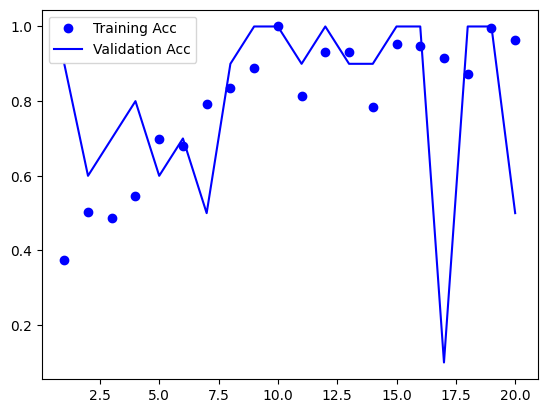

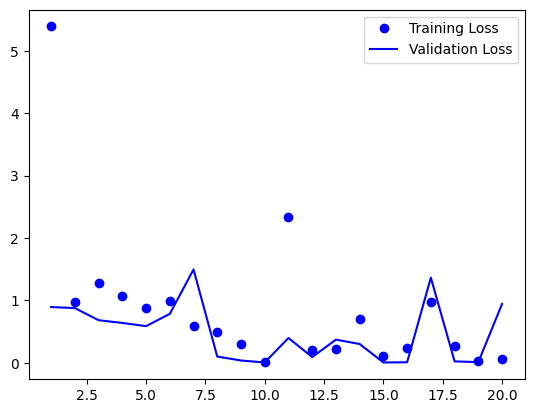

<Figure size 640x480 with 0 Axes>

In [177]:
hi = history.history
acc = hi['acc']
val_acc = hi['val_acc']
loss = hi['loss']
val_loss = hi['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc,'b',label = 'Validation Acc')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.legend()
plt.figure()


<h1>Using Vgg16 as pretrained model

In [194]:
from keras.applications import VGG16

In [195]:
conv_base  = VGG16(weights='imagenet',
                   include_top = False,
                   input_shape = (200,200,3))

In [196]:
print("This is the Summary of the conv base it self")
conv_base.summary()

This is the Summary of the conv base it self
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (Ma

In [197]:
# un - freezing the block5_conv1 for fine tunning 
conv_base.trainable = True

for layer in conv_base.layers:
    if (layer.name == 'block5_conv1'):
        layer.trainable = True
    else:
        layer.trainable = False

In [198]:
# model 2
second_model = Sequential()
second_model.add(conv_base)
second_model.add(Flatten())
second_model.add(Dense(512,activation = 'relu'))
second_model.add(Dropout(0.3))
second_model.add(Dense(256,activation = 'relu'))
second_model.add(Dropout(0.3))
second_model.add(Dense(3,activation = 'softmax'))

In [199]:
# now training the model with fine tunning
second_model.compile(loss = 'binary_crossentropy',
                     optimizer =optimizers.RMSprop(learning_rate=1e-5),
                     metrics = ['acc'])

In [200]:
history2 = second_model.fit(train_generator,
                 steps_per_epoch=10,
                 epochs=8,
                 validation_data = val_genrator,
                 validation_steps=10)

Epoch 1/8
10/10 [==============================] - 4s 281ms/step - loss: 0.6623 - acc: 0.4233 - val_loss: 0.5091 - val_acc: 0.6000
Epoch 2/8
10/10 [==============================] - 3s 278ms/step - loss: 0.5662 - acc: 0.5661 - val_loss: 0.4820 - val_acc: 0.7500
Epoch 3/8
10/10 [==============================] - 3s 279ms/step - loss: 0.5686 - acc: 0.5661 - val_loss: 0.4321 - val_acc: 0.7000
Epoch 4/8
10/10 [==============================] - 3s 282ms/step - loss: 0.5175 - acc: 0.7143 - val_loss: 0.4283 - val_acc: 0.7000
Epoch 5/8
10/10 [==============================] - 3s 296ms/step - loss: 0.4711 - acc: 0.7250 - val_loss: 0.3570 - val_acc: 0.8000
Epoch 6/8
10/10 [==============================] - 3s 279ms/step - loss: 0.4352 - acc: 0.7354 - val_loss: 0.3534 - val_acc: 0.9000
Epoch 7/8
10/10 [==============================] - 3s 298ms/step - loss: 0.3878 - acc: 0.7884 - val_loss: 0.2753 - val_acc: 0.9000
Epoch 8/8
10/10 [==============================] - 3s 276ms/step - loss: 0.3615 - a

<Figure size 640x480 with 0 Axes>

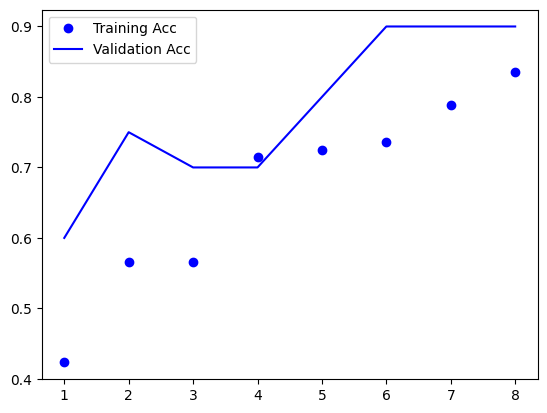

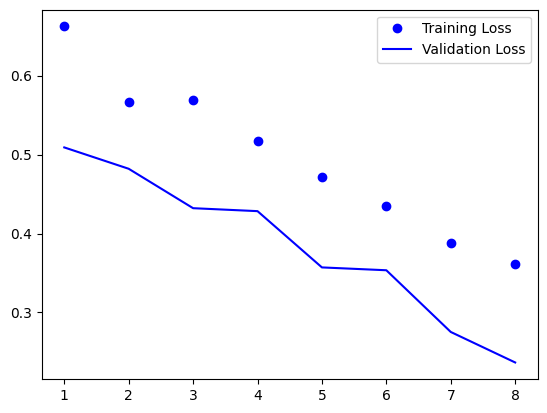

<Figure size 640x480 with 0 Axes>

In [201]:
hi = history2.history
acc = hi['acc']
val_acc = hi['val_acc']
loss = hi['loss']
val_loss = hi['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training Acc')
plt.plot(epochs,val_acc,'b',label = 'Validation Acc')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.legend()
plt.figure()


In [202]:
from PIL import Image
import gradio as gr
import seaborn as sns

from tensorflow.keras.preprocessing import image 

In [203]:

def custom_Image_preprocessing(image_data, target_size=(200, 200)):
    img = image.array_to_img(image_data, data_format='channels_last')
    img = img.resize(target_size)  # Resize the image if needed
    img_arr = image.img_to_array(img)
    img_arr = img_arr * 1./255
    img_arr = np.expand_dims(img_arr, axis=0)
    return img_arr


In [212]:
# function to predict the custome image

def image_predict(image_path):
    
    image_preprocess = custom_Image_preprocessing(image_path)
    result = second_model.predict(image_preprocess)
    print(result)
    max_index = np.argmax(result)
    if(max_index == 0):
        return('This is 1000 Rs Note')
    elif(max_index == 1):
        return("This is 500 Rs Note")
    else:
        return("This is 5000 Rs Note")
    print(max_index)

In [222]:
input_component =  gr.components.Image(label = "Reupee")
output_component = gr.components.Textbox(label = "Prediction")
interface = gr.Interface(fn=image_predict, 
                         inputs=input_component, 
                         outputs=output_component,title = "Note Classification",
                         description="Pakistan reupee note classification between 500 , 1000 and 5000")
interface.launch(share=True)


Running on local URL:  http://127.0.0.1:7874
Running on public URL: https://4cc348991e59cffe8c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
